<a href="https://colab.research.google.com/github/aayushmanace/Assignment/blob/main/20004_DL316_Asg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DSE 316/616: Deep Learning**
---
### Assignment 1




### The below code demonstrates the use of convolutional neural network and fully connected to perform facial recognition using [Olivetti facial dataset](https://scikit-learn.org/0.19/datasets/olivetti_faces.html#olivetti-faces).

## ``Conv-Pool-Conv-Pool-Conv-Pool-FC-FC``

Conv means Convolution layer

FC refers to fully connected layer

Pool refers to maxpool layer


In [ ]:
# Importing necessary modules
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [ ]:
# Load Olivetti faces dataset
faces = fetch_olivetti_faces()
X = faces.data
y = faces.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""
Data is converted to PyTorch tensors
specifically X_train and X_test is reshaped to have four dimensions;

1st dimension represent number of samples
2nd dimension represent number of channels
3rd and 4th dimensions represent the height and width of the images repectively

The resulting arrays are then converted into PyTorch tensors using the torch.from_numpy function, 
and the data type is set to float for the input tensors and long for the label tensors.
"""
# Convert data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train.reshape(-1, 1, 64, 64)).float()
y_train_tensor = torch.from_numpy(y_train).long()
X_test_tensor = torch.from_numpy(X_test.reshape(-1, 1, 64, 64)).float()
y_test_tensor = torch.from_numpy(y_test).long()


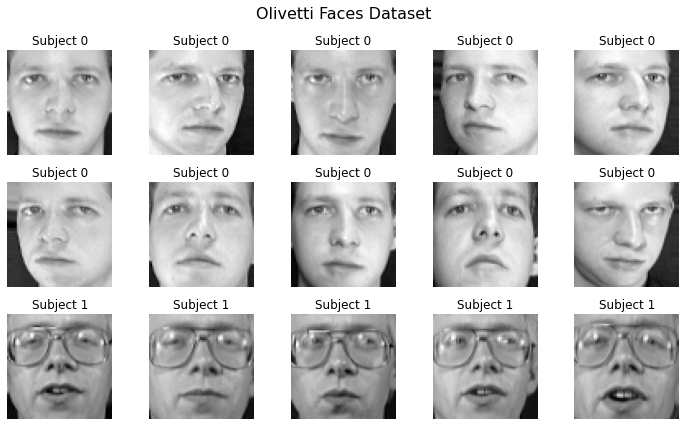

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load the dataset
dataset = fetch_olivetti_faces()
X = dataset.images
y = dataset.target

# Plot some example images
fig, axs = plt.subplots(3, 5, figsize=(10, 6))
axs = axs.flatten()

for i in range(len(axs)):
    axs[i].imshow(X[i], cmap='gray')
    axs[i].set_title(f'Subject {y[i]}')
    axs[i].axis('off')

plt.suptitle('Olivetti Faces Dataset', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([320, 1, 64, 64]), torch.Size([320]))

In [ ]:
# Define CNN architecture
class NetA(nn.Module):
    def __init__(self):
        super(NetA, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 40)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = NetA()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15
batch_size = 16
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch inputs and labels
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print('Epoch [%d], loss: %.4f' % (epoch+1, running_loss / len(X_train)))

# Test the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)
    print('Test accuracy: %.4f' % accuracy)


Epoch [1], loss: 0.2314
Epoch [2], loss: 0.2308
Epoch [3], loss: 0.2300
Epoch [4], loss: 0.2278
Epoch [5], loss: 0.2149
Epoch [6], loss: 0.1800
Epoch [7], loss: 0.1368
Epoch [8], loss: 0.0940
Epoch [9], loss: 0.0593
Epoch [10], loss: 0.0433
Epoch [11], loss: 0.0343
Epoch [12], loss: 0.0252
Epoch [13], loss: 0.0214
Epoch [14], loss: 0.0106
Epoch [15], loss: 0.0095
Test accuracy: 0.8375


## Experiment

In [ ]:
# Define CNN architecture
class NetEB(nn.Module):
    def __init__(self):
        super(NetEB, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 40)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


# Instantiate the model
model = NetEB()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15
batch_size = 16
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch inputs and labels
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print('Epoch [%d], loss: %.4f' % (epoch+1, running_loss / len(X_train)))

# Test the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)
    print('Test accuracy: %.4f' % accuracy)


Epoch [1], loss: 0.2310
Epoch [2], loss: 0.2294
Epoch [3], loss: 0.2177
Epoch [4], loss: 0.1870
Epoch [5], loss: 0.1426
Epoch [6], loss: 0.1038
Epoch [7], loss: 0.0696
Epoch [8], loss: 0.0490
Epoch [9], loss: 0.0374
Epoch [10], loss: 0.0305
Epoch [11], loss: 0.0309
Epoch [12], loss: 0.0316
Epoch [13], loss: 0.0213
Epoch [14], loss: 0.0163
Epoch [15], loss: 0.0106
Test accuracy: 0.8750


In [ ]:
class NetEC(nn.Module):
    def __init__(self):
        super(NetEC, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=4, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=4, stride=2, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=4, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 40)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = NetEC()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15
batch_size = 16
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch inputs and labels
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print('Epoch [%d], loss: %.4f' % (epoch+1, running_loss / len(X_train)))

# Test the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)
    print('Test accuracy: %.4f' % accuracy)



Epoch [1], loss: 0.2307
Epoch [2], loss: 0.2302
Epoch [3], loss: 0.2281
Epoch [4], loss: 0.2140
Epoch [5], loss: 0.1814
Epoch [6], loss: 0.1418
Epoch [7], loss: 0.1157
Epoch [8], loss: 0.0989
Epoch [9], loss: 0.0782
Epoch [10], loss: 0.0672
Epoch [11], loss: 0.0593
Epoch [12], loss: 0.0576
Epoch [13], loss: 0.0403
Epoch [14], loss: 0.0271
Epoch [15], loss: 0.0204
Test accuracy: 0.7500


In [ ]:
#Using this cell to experiment with MaxPool2d
import torch.nn as nn

# Create a 64x64 tensor as an example image
image = torch.randn(1, 1, 64, 64)

# Define the maxpooling layer with kernel size 3, stride 2, and no padding
maxpool = nn.MaxPool2d(kernel_size=5, stride=2, padding=0) # changing the kernel_size, stride, padding

# Apply maxpooling to the image for 3 consecutive steps
for i in range(3):
    image = maxpool(image)
    print(f"Step {i+1}: image shape = {image.shape}")


Step 1: image shape = torch.Size([1, 1, 30, 30])
Step 2: image shape = torch.Size([1, 1, 13, 13])
Step 3: image shape = torch.Size([1, 1, 5, 5])


In [ ]:
class NetED(nn.Module):
    def __init__(self):
        super(NetED, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=5, stride=2, padding=0)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=5, stride=2, padding=0)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=5, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 40)
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = NetED()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15
batch_size = 16
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch inputs and labels
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print('Epoch [%d], loss: %.4f' % (epoch+1, running_loss / len(X_train)))

# Test the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)
    print('Test accuracy: %.4f' % accuracy)


Epoch [1], loss: 0.2308
Epoch [2], loss: 0.2304
Epoch [3], loss: 0.2302
Epoch [4], loss: 0.2297
Epoch [5], loss: 0.2268
Epoch [6], loss: 0.2156
Epoch [7], loss: 0.1928
Epoch [8], loss: 0.1624
Epoch [9], loss: 0.1357
Epoch [10], loss: 0.1145
Epoch [11], loss: 0.0891
Epoch [12], loss: 0.0749
Epoch [13], loss: 0.0638
Epoch [14], loss: 0.0546
Epoch [15], loss: 0.0460
Test accuracy: 0.6250


## ``Conv-Pool-Conv-Pool-Conv-Pool-FC-FC``

Conv means Convolution layer

FC refers to fully connected layer

Pool refers to maxpool layer

In [ ]:
# Define CNN architecture
class NetB(nn.Module):
    def __init__(self):
        super(NetB, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 40)
        
        
    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = self.pool3(torch.relu(self.conv3(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        return x

# Instantiate the model
model = NetB()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15
batch_size = 16
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch inputs and labels
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print('Epoch [%d], loss: %.4f' % (epoch+1, running_loss / len(X_train)))

# Test the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)
    print('Test accuracy: %.4f' % accuracy)


Epoch [1], loss: 0.2308
Epoch [2], loss: 0.2306
Epoch [3], loss: 0.2306
Epoch [4], loss: 0.2306
Epoch [5], loss: 0.2306
Epoch [6], loss: 0.2306
Epoch [7], loss: 0.2306
Epoch [8], loss: 0.2306
Epoch [9], loss: 0.2306
Epoch [10], loss: 0.2306
Epoch [11], loss: 0.2306
Epoch [12], loss: 0.2306
Epoch [13], loss: 0.2306
Epoch [14], loss: 0.2306
Epoch [15], loss: 0.2306
Test accuracy: 0.0375


## ``Conv-Conv-Pool-Conv-Conv-Pool-FC``

Conv means Convolution layer

FC refers to fully connected layer

Pool refers to maxpool layer

In [ ]:
# Define CNN architecture
class NetC(nn.Module):
    def __init__(self):
        super(NetC, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv3 = nn.Conv2d(32, 48, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(48, 64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(64 * 16 * 16, 40)
                
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool1(x)
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = self.pool2(x)
        x = x.view(-1, 64 * 16 * 16)
        x = torch.relu(self.fc1(x))
        return x

# Instantiate the model
model = NetC()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 15
batch_size = 16
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch inputs and labels
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    print('Epoch [%d], loss: %.4f' % (epoch+1, running_loss / len(X_train)))

# Test the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test)
    print('Test accuracy: %.4f' % accuracy)


Epoch [1], loss: 0.2309
Epoch [2], loss: 0.2306
Epoch [3], loss: 0.2304
Epoch [4], loss: 0.2303
Epoch [5], loss: 0.2300
Epoch [6], loss: 0.2294
Epoch [7], loss: 0.2240
Epoch [8], loss: 0.2194
Epoch [9], loss: 0.2183
Epoch [10], loss: 0.2172
Epoch [11], loss: 0.2170
Epoch [12], loss: 0.2169
Epoch [13], loss: 0.2169
Epoch [14], loss: 0.2169
Epoch [15], loss: 0.2169
Test accuracy: 0.0500


`In general adding more fully connected layers can improve the accuracy of a neural network, up to which it network start overfitting the training data.`

`On the other hand, reducing the number of fully connected layers can result in lower accuracy, as the network may not have enough capacity to learn relationship in the data.`

`Increasing the size of a neural network by adding more layers and/or increasing the number of neurons in each layer can improve its accuracy, up to a point where the network starts overfitting the training data. This occurs when the network becomes too complex and starts to memorize the training data rather than learning generalizable patterns.`

## Implementing a 3-layer deep neural network from scratch just using numpy For multiclass classification on [SVHN dataset](http://ufldl.stanford.edu/housenumbers/).



In [ ]:
# importing necessary library
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [ ]:
# mounting google drive to notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


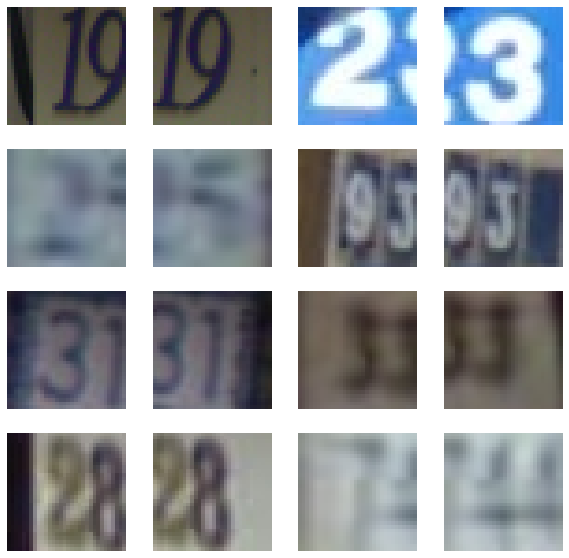

(60000, 3072)


In [ ]:
#uncomment below before running the cell

# importing the data into the notebook 
data=scipy.io.loadmat("/content/drive/MyDrive/train_32x32.mat") #make sure that file remain in the same directory as of the notebook

X=data['X']
Y=data['y']

"""
the shape of "X" is changed from (32, 32, 3, 73257) to (3072, 73257c)
using the "reshape()" function
and transposed to have the shape (73257, 3072) for further processing.
"""

X = np.transpose(data['X'], (3, 0, 1, 2))

# Plot the first 16 images
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(16):
    row = i // 4
    col = i % 4
    axs[row, col].imshow(X[i])
    axs[row, col].axis('off')
plt.show()


X = X.reshape(73257, 3072)
Y=Y.T

"""pixel values are normalized by dividing each value by 255"""
X=X/255

"""
the data is split into training and testing sets
The first 60000 rows of "X" and "Y" are taken as training data
and the remaining rows are taken as testing data
"""

X_train=X[:60000]
X_test=X[60000:]
Y_train=Y[:,:60000]
Y_test=Y[:,60000:]

print(X_train.shape)


In [ ]:
Y_train.reshape(-1)-1

array([0, 8, 1, ..., 8, 2, 2], dtype=uint8)

one_hot encoding

In [ ]:
def one_hot(Y):
  return np.eye(10)[Y.reshape(-1)-1]

one_hot(Y_train)[2]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
nn.forward(X_train)-one_hot(Y_train)

array([[-0.802497  ,  0.14436505,  0.11653818, ...,  0.06897832,
         0.06574115,  0.0683594 ],
       [ 0.19603395,  0.14379244,  0.11604396, ...,  0.06873072,
        -0.93494607,  0.06803438],
       [ 0.19375436, -0.85707721,  0.11464515, ...,  0.06821226,
         0.06404991,  0.06761498],
       ...,
       [ 0.19743457,  0.14605635,  0.11796589, ...,  0.06966061,
        -0.93350004,  0.06904854],
       [ 0.19415278,  0.14361486, -0.88422675, ...,  0.06850126,
         0.06442837,  0.06773498],
       [ 0.19473019,  0.14281612, -0.88483153, ...,  0.06830696,
         0.06415541,  0.06737916]])

In [ ]:
Y_train[:,1]

array([9], dtype=uint8)

In [ ]:
# Defining the neural network
class neural_network:
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size

        self.W1 = np.random.randn(self.input_size, self.hidden_size)* np.sqrt(2 / (input_size + hidden_size))
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.hidden_size)* np.sqrt(2 / (hidden_size + output_size))
        self.b2 = np.zeros((1, self.hidden_size))
        self.W3 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(1/self.hidden_size)
        self.b3 = np.zeros((1, self.output_size))

        self.SdW1 = 0
        self.Sdb1 = 0
        self.SdW2 = 0
        self.Sdb2 = 0
        self.SdW3 = 0
        self.Sdb3 = 0

        self.a1 = 0
        self.a2 = 0
        self.z1 = 0
        self.z2 = 0
        self.z3 = 0

        self.output = 0    
        
        self.eps = 1e-8
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.output = self.sigmoid(self.z3)

        return self.output
    def sigmoid_derivative(self, s):
    
    #computing the derivative of the sigmoid function ASSUMING
		#that x has already been passed through the 'sigmoid'
		#function

        return s * (1 - s)

    """Implementing backpropagation"""
    def backward(self, X, y_true):
        #backward pass
        m,n = X.shape
        delta = self.forward(X) - one_hot(y_true)
        delta2 = np.dot(delta, self.W3.T) * self.sigmoid_derivative(self.a2)
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)

        # Calculate the gradient
        dW3 = np.dot(self.a2.T, delta)
        db3 = np.sum(delta, axis=0, keepdims=True)
        dW2 = np.dot(self.a1.T, delta2)
        db2 = np.sum(delta2, axis=0)
        dW1 = np.dot(X.T.reshape(n,m), delta1)
        db1 = np.sum(delta1, axis=0)

        return dW1, db1, dW2, db2, dW3, db3

    """Implementing Cross-Entropy Loss"""
    def cross_entropy_loss(self, y_true, y_pred, epsilon=1e-12):
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        n_samples = y_pred.shape[0]
        loss = -(1 / n_samples) * np.sum(one_hot(y_true) * np.log(y_pred))
        return loss

  
    """Implementing SGD optimizer to update the weights"""
    def sgd_optimizer(self, X, y_true, lr, gamma, batch_size):
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y_true[i:i+batch_size]
            dW1, db1, dW2, db2, dW3, db3 = self.backward(X_batch, y_batch)
            self.W1 = self.W1 - lr*dW1 - gamma*self.W1
            self.b1 = self.b1 - lr*db1
            self.W2 = self.W2 - lr*dW2 - gamma*self.W2
            self.b2 = self.b2 - lr*db2
            self.W3 = self.W3 - lr*dW3 - gamma*self.W3
            self.b3 = self.b3 - lr*db3
    """Implementing RMSProp optimizer to update the weights"""
    def rms_prop(self,X,y_true,learning_rate,decay_rate):
        y_pred = self.forward(X)
        dW1, db1, dW2, db2, dW3, db3 = self.backward(X, y_true)
        self.SdW1 = decay_rate * self.SdW1 + (1 - decay_rate) * np.power(dW1, 2)
        self.Sdb1 = decay_rate * self.Sdb1 + (1 - decay_rate) * np.power(db1, 2)
        self.SdW2 = decay_rate * self.SdW2 + (1 - decay_rate) * np.power(dW2, 2)
        self.Sdb2 = decay_rate * self.Sdb2 + (1 - decay_rate) * np.power(db2, 2)
        self.SdW3 = decay_rate * self.SdW3 + (1 - decay_rate) * np.power(dW3, 2)
        self.Sdb3 = decay_rate * self.Sdb3 + (1 - decay_rate) * np.power(db3, 2)

        self.W1 -= learning_rate * dW1 / np.sqrt(self.SdW1 + self.eps)
        self.b1 -= learning_rate * db1 / np.sqrt(self.Sdb1 + self.eps)
        self.W2 -= learning_rate * dW2 / np.sqrt(self.SdW2 + self.eps)
        self.b2 -= learning_rate * db2 / np.sqrt(self.Sdb2 + self.eps)
        self.W3 -= learning_rate * dW3 / np.sqrt(self.SdW3 + self.eps)
        self.b3 -= learning_rate * db3 / np.sqrt(self.Sdb3 + self.eps)



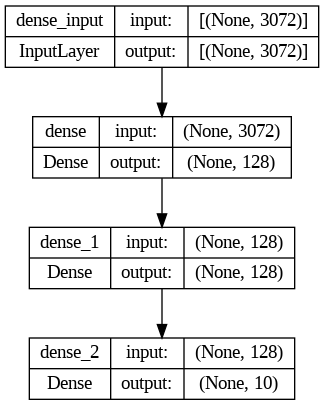

In [ ]:
"""Implementing SGD"""
def sgd_train(X, y, lr = 0.01, gamma=0, epochs= 100, batch_size = 32):
    m = X.shape[0]

    print("######   Training Begins  ########")
    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[:,indices]
        #print("EPOCH", epoch)
        for i in range(0,m,batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[:,i:i+batch_size]
            nn.sgd_optimizer(xi,yi, lr, gamma, batch_size) #update weights and biases using 
        if epoch % 10 == 0 or epoch == 99:
            print("Epoch:[{}/{}] ".format(epoch, epochs), "Loss: ", nn.cross_entropy_loss(y, nn.forward(X)))

In [ ]:
def rms_train(model, X_train, Y_train, num_epochs=50, learning_rate=0.001, decay_rate=0.9, print_loss=True):
    print("######   Training Begins  ########")
    for epoch in range(num_epochs):
        model.rms_prop(X_train, Y_train, learning_rate=learning_rate, decay_rate=decay_rate)
        if epoch % 10 == 0 or epoch == num_epochs - 1:
            loss = model.cross_entropy_loss(Y_train, model.forward(X_train))
            if print_loss:
                print("Epoch:[{}/{}] Loss: {}".format(epoch+1, num_epochs, loss))
    return model

### Training

In [ ]:
nn = neural_network(3072,10,128)
sgd_train(X_train, Y_train)

######   Training Begins  ########
Epoch:[0/100]  Loss:  2.2345946914217603
Epoch:[10/100]  Loss:  0.9489402365541856
Epoch:[20/100]  Loss:  0.7882814645481737
Epoch:[30/100]  Loss:  0.7424106108300464
Epoch:[40/100]  Loss:  0.6629931129748664
Epoch:[50/100]  Loss:  0.690989383842067
Epoch:[60/100]  Loss:  0.6536119662571854
Epoch:[70/100]  Loss:  0.5877515347909927
Epoch:[80/100]  Loss:  0.630085991943565
Epoch:[90/100]  Loss:  0.6119998370680491
Epoch:[99/100]  Loss:  0.6058197648077539


In [ ]:
"""
Code to implement accuracy of the model
"""

y_pred = nn.forward(X_test)

# Compute the accuracy
accuracy = np.mean(y_pred.argmax(axis=1) == Y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.018179075205551783


In [ ]:
"""
Code to implement F1_score of the model
"""

y_pred = nn.forward(X_test)
y_pred_classes = y_pred.argmax(axis=1)

precision = []
for i in range(10):
    tp = np.sum((y_pred_classes == i) & (Y_test == i))
    fp = np.sum((y_pred_classes == i) & (Y_test != i))
    precision_i = tp / (tp + fp)
    precision.append(precision_i)

overall_precision = np.mean(precision)

print("Precision: ", overall_precision)

Precision:  0.021719438440326942


In [ ]:
def test_loss(model,X_test, y_test):
    with torch.no_grad():
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.long)
        outputs = model.forward(X_test_tensor)
        loss = nn.cross_entropy_loss(y_test_tensor, outputs)
    return loss.item()

In [ ]:
test_loss(nn, X_test,Y_test)

2.2296679727269977

In [ ]:
nn = neural_network(3072,10,128)
rms_train(nn, X_train, Y_train)

######   Training Begins  ########
Epoch:[1/50] Loss: 0.9142448015539423
Epoch:[11/50] Loss: 1.5762609189268542
Epoch:[21/50] Loss: 1.9543752035605708
Epoch:[31/50] Loss: 2.149853850768731
Epoch:[41/50] Loss: 2.2217955792533504
Epoch:[50/50] Loss: 2.230119156385746
